In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


[Database Download:-](https://drive.google.com/file/d/1qRhiRExZFIMDVINDPTpgcOXJlaVfBnGA/view?usp=drive_link)

# Load Dataset Using Pandas

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Change this path to your actual file location
file_path = '/content/drive/My Drive/spam.csv'

df = pd.read_csv(file_path, encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'text']
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

df.head()


,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.loc[0,'text']  # Label Based indexing

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [4]:
df.iloc[0,0] # Integer Based indexing

np.int64(0)

In [ ]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [5]:
df[df['text'].isin(['nan',None])]

,label,text


In [6]:
df['label'].value_counts()

,count
label,
0,4825
1,747


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   int64 
 1   text    5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [8]:
# Convert 'text' column to int 32
df['label'] = df['label'].astype('int32')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   int32 
 1   text    5572 non-null   object
dtypes: int32(1), object(1)
memory usage: 65.4+ KB


In [ ]:
print(df.isnull().sum())
print(df.isnull().sum()/df.shape[0])

label    0
text     0
dtype: int64
label    0.0
text     0.0
dtype: float64


In [10]:
# Replace missing (or all) values with the median
df['text'] = df['text'].fillna(df['text'].mode())

In [11]:
df.size,df.shape

(11144, (5572, 2))

In [ ]:
df.columns

Index(['label', 'text'], dtype='object')

<Axes: xlabel='label', ylabel='count'>

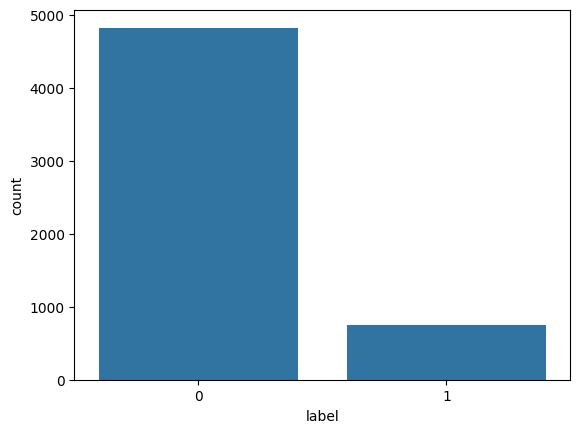

In [ ]:
sns.countplot(x=df['label'])

In [12]:
# NLP libraries to clean the text data
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
import nltk
from nltk.tokenize import word_tokenize
from flask import Flask, request, jsonify
import pickle

In [13]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [14]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 54.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [15]:
import spacy
nlp = spacy.load('en_core_web_sm')

token = nlp(df['text'][5])
token

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv

In [16]:
dir(token)

['_',
 '__bytes__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '_bulk_merge',
 '_context',
 '_get_array_attrs',
 '_realloc',
 '_vector',
 '_vector_norm',
 'cats',
 'char_span',
 'copy',
 'count_by',
 'doc',
 'ents',
 'extend_tensor',
 'from_array',
 'from_bytes',
 'from_dict',
 'from_disk',
 'from_docs',
 'from_json',
 'get_extension',
 'get_lca_matrix',
 'has_annotation',
 'has_extension',
 'has_unknown_spaces',
 'has_vector',
 'is_nered',
 'is_parsed',
 'is_sentenced',
 'is_tagged',
 'lang',
 'lang_',
 'mem',
 'noun_chunks',
 'noun_chunks_iterator',
 'remove_extension',
 'retokenize',
 'sentiment'

# Data Cleaning and Preprocessing:-

In [17]:
# Preprocessing function
def preprocess(text):
    if not isinstance(text, str):
        return ''
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(tokens)

In [18]:
df['clean_text'] = df['text'].apply(preprocess)

In [19]:
df.head()

,label,text,clean_text
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah dont think goe usf live around though


# Hypothesis testing:-

In [ ]:
from textblob import TextBlob
from scipy.stats import ttest_ind

# Apply sentiment analysis
df['polarity'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [ ]:
df.head()

,label,text,clean_text,polarity
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...,0.15
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni,0.50
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...,0.30
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say,0.10
4,0,"Nah I don't think he goes to usf, he lives aro...",nah dont think goe usf live around though,0.00


/tmp/ipython-input-96-463331062.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['polarity'])


<Axes: xlabel='polarity', ylabel='Density'>

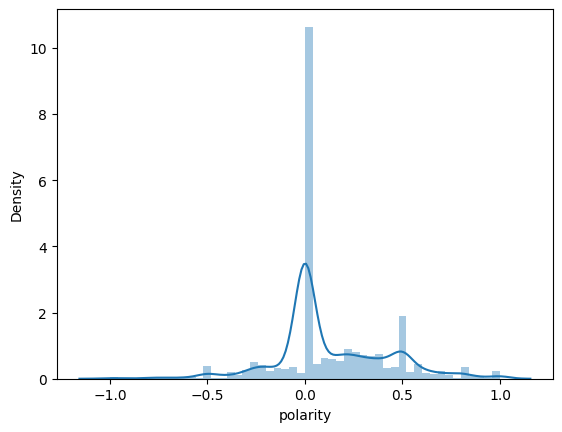

In [ ]:
sns.distplot(df['polarity'])

In [ ]:
df['target'] = df['polarity'].apply(lambda x: 1 if x >=0 else 0 )

In [ ]:
df.head()

,label,text,clean_text,polarity,target
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...,0.15,1
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni,0.50,1
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...,0.30,1
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say,0.10,1
4,0,"Nah I don't think he goes to usf, he lives aro...",nah dont think goe usf live around though,0.00,1


<Axes: ylabel='polarity'>

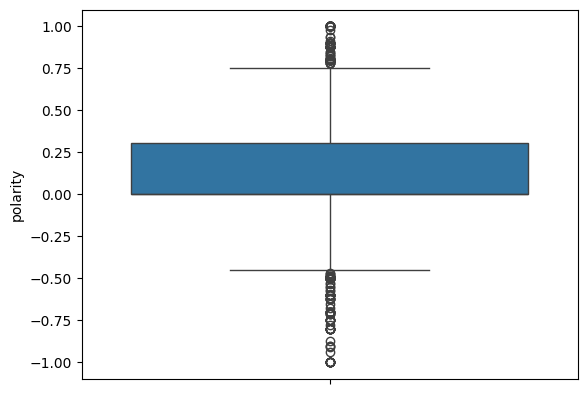

In [ ]:
sns.boxplot(df['polarity'])

In [ ]:
q1,q3 = df['polarity'].quantile([0.25,0.75])
q1,q3

IQR = q3 - q1

min_= q1 - 1.5 * IQR
max_= q3 + 1.5 * IQR

min_, max_

new_df = df[(df['polarity']>=min_)  & (df['polarity']<=max_)]

new_df.head()

,label,text,clean_text,polarity,target
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...,0.15,1
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni,0.50,1
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...,0.30,1
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say,0.10,1
4,0,"Nah I don't think he goes to usf, he lives aro...",nah dont think goe usf live around though,0.00,1


In [ ]:
df.shape,new_df.shape

((5572, 5), (5243, 5))

<Axes: ylabel='polarity'>

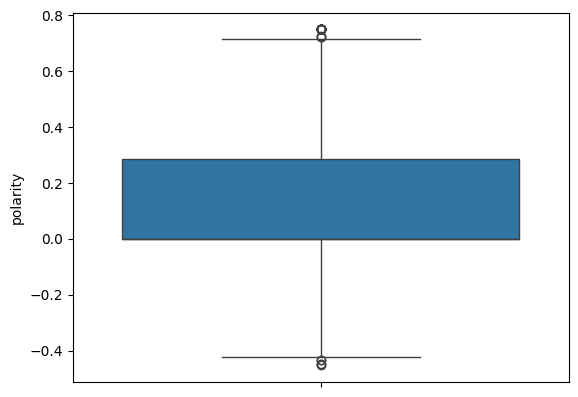

In [ ]:
sns.boxplot(new_df['polarity'])

In [ ]:
from scipy.stats import ttest_ind

group_a = new_df[new_df['label'] == 1]['polarity']
group_b = new_df[new_df['label'] == 0]['polarity']

# Apply t-test
t_stat, p_value = ttest_ind(group_a, group_b)

print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.3f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Significant difference in sentiment.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")

T-statistic: 6.691, P-value: 0.000
Reject the null hypothesis: Significant difference in sentiment.


In [ ]:
from scipy.stats import ttest_ind

group_a = new_df[new_df['target'] == 1]['polarity']
group_b = new_df[new_df['target'] == 0]['polarity']

# Apply t-test
t_stat, p_value = ttest_ind(group_a, group_b)

print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.3f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Significant difference in sentiment.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")

T-statistic: 42.475, P-value: 0.000
Reject the null hypothesis: Significant difference in sentiment.


In [20]:
# For Splitting the dataset
from sklearn.model_selection import train_test_split

#Accuracy measuring library
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score ,precision_score,recall_score ,roc_auc_score

# Vectorization technique TF-IDF or CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

# sklearn Pipeline
from sklearn.pipeline import Pipeline

from imblearn.pipeline import Pipeline as ImbPipeline

In [24]:
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['label'], test_size=0.2, random_state=42,stratify=df['label'])

In [25]:
X_train.shape,y_train.shape

((4457,), (4457,))

In [26]:
X_test.shape,y_test.shape

((1115,), (1115,))

In [30]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# 🧠 Part 1: Machine Learning Model – Logistic Regression
✅ Train Model with Regularization and Cross Validation

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

lr = LogisticRegressionCV(cv=5, penalty='l2', scoring='accuracy', max_iter=1000)
lr.fit(X_train_vec, y_train)

y_pred = lr.predict(X_test_vec)
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, lr.predict_proba(X_test_vec)[:, 1]))


              precision    recall  f1-score   support

           0       0.98      0.99      0.99       966
           1       0.96      0.90      0.93       149

    accuracy                           0.98      1115
   macro avg       0.97      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115

ROC AUC: 0.9836939152667195


In [ ]:
lr.fit(X_train_smote_tomek, y_train_smote_tomek)

y_pred = lr.predict(X_test_vec)
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, lr.predict_proba(X_test_vec)[:, 1]))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       966
           1       0.96      0.90      0.93       149

    accuracy                           0.98      1115
   macro avg       0.97      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115

ROC AUC: 0.9835271721761363


# 🧠 Part 2: Deep Learning Model – Keras (Dense NN)
✅ Deep Learning with Dropout & Early Stopping

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelBinarizer

X_train_dl = X_train_vec.toarray()
X_test_dl = X_test_vec.toarray()

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train_dl.shape[1],)))
model.add(Dropout(0.4))  # Prevent overfitting
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(X_train_dl, y_train, epochs=15, batch_size=32,
                    validation_split=0.2, callbacks=[early_stop])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
112/112 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.8723 - loss: 0.4885 - val_accuracy: 0.8430 - val_loss: 0.2074
Epoch 2/15
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9362 - loss: 0.1188 - val_accuracy: 0.9765 - val_loss: 0.1003
Epoch 3/15
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9919 - loss: 0.0271 - val_accuracy: 0.9709 - val_loss: 0.1376
Epoch 4/15
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9960 - loss: 0.0105 - val_accuracy: 0.9720 - val_loss: 0.1466
Epoch 5/15
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9995 - loss: 0.0039 - val_accuracy: 0.9765 - val_loss: 0.1313


In [ ]:
# X_train_dl = X_train_smote_tomek.toarray()
# X_test_dl = X_test_vec.toarray()

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train_dl.shape[1],)))
model.add(Dropout(0.4))  # Prevent overfitting
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(X_train_smote_tomek, y_train_smote_tomek, epochs=15, batch_size=32,
                    validation_split=0.2, callbacks=[early_stop])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
193/193 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.7579 - loss: 0.4431 - val_accuracy: 0.9961 - val_loss: 0.0141
Epoch 2/15
193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9951 - loss: 0.0162 - val_accuracy: 0.9955 - val_loss: 0.0134
Epoch 3/15
193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9987 - loss: 0.0061 - val_accuracy: 1.0000 - val_loss: 1.8574e-04
Epoch 4/15
193/193 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9990 - loss: 0.0026 - val_accuracy: 1.0000 - val_loss: 5.8205e-04
Epoch 5/15
193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9999 - loss: 9.6123e-04 - val_accuracy: 1.0000 - val_loss: 1.1176e-04
Epoch 6/15
193/193 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 1.0000 - loss: 3.0118e-04 - val_accuracy: 1.0000 - val_loss: 7.5077e-05
Epoch 7/15
193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 1.0000 - loss: 1.6114e-04 - val_accuracy: 1.0000 - val_loss: 2.3674e-05
Epoch 8/15
193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 

# ✅ Evaluate Deep Learning Model

In [ ]:
loss, accuracy = model.evaluate(X_test_dl, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

from sklearn.metrics import roc_auc_score
y_prob = model.predict(X_test_dl).ravel()
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9893 - loss: 0.1249
Test Accuracy: 0.9848
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
ROC AUC Score: 0.9824711326024428


In [ ]:
print(classification_report(y_test, y_pred))

# Convert probabilities to class labels (0 or 1)
y_pred_class = [1 if p >= 0.5 else 0 for p in y_pred]

# Now compute classification metrics
accuracy = accuracy_score(y_test, y_pred_class)
print("Accuracy:", accuracy)

print(confusion_matrix(y_test, y_pred_class))
print(f'accuracy_score:-{accuracy_score(y_test, y_pred_class)}')
print(f'f1_score:- {f1_score(y_test, y_pred_class)}')
print(f'precision_score:- {precision_score(y_test, y_pred_class)}')
print(f'recall_score:- {recall_score(y_test, y_pred_class)}')
print(f'roc_auc_score:- {roc_auc_score(y_test, y_pred_class)}')

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       966
           1       0.96      0.90      0.93       149

    accuracy                           0.98      1115
   macro avg       0.97      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115

Accuracy: 0.9820627802690582
[[961   5]
 [ 15 134]]
accuracy_score:-0.9820627802690582
f1_score:- 0.9305555555555556
precision_score:- 0.9640287769784173
recall_score:- 0.8993288590604027
roc_auc_score:- 0.9470764378117749


# 📉 Plot Accuracy vs Loss

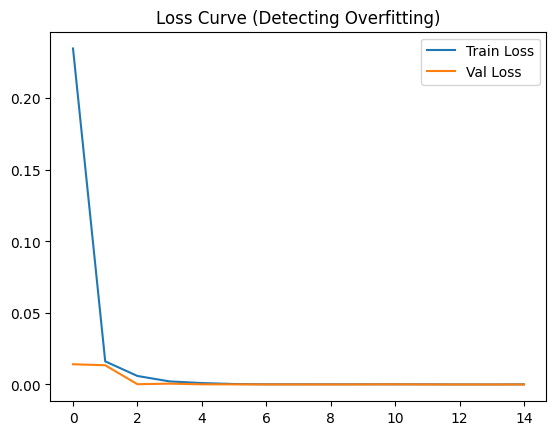

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss Curve (Detecting Overfitting)")
plt.show()

# ✅ Concepts Handled:
1. Text cleaning & TF-IDF vectorization

2. Logistic Regression with L2 Regularization & Cross-Validation

3. Deep Learning model with Dropout & EarlyStopping

4. ROC-AUC, Accuracy, Precision/Recall metrics

5. Overfitting prevention (Dropout, Regularization, EarlyStopping)

# Over Sampling and under Sampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler , TomekLinks
from imblearn.combine import SMOTETomek

In [ ]:
# Apply Random Under Sampling
under_sampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = under_sampler.fit_resample(X_train_dl, y_train) # X_train_vec

# Count the class distribution after under sampling
print("Class distribution after Random Under Sampling:", y_train_under.value_counts())

Class distribution after Random Under Sampling: label
0    598
1    598
Name: count, dtype: int64


In [ ]:
# Apply Random Over Sampling
over_sampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train_dl, y_train)

# Count the class distribution after over sampling
print("Class distribution after Random Over Sampling:", y_train_over.value_counts())

Class distribution after Random Over Sampling: label
0    3859
1    3859
Name: count, dtype: int64


In [ ]:
# Apply SMOTE to balance the training dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_dl, y_train)

print(f'Original dataset shape {y_train.value_counts()}')
print(f'Resampled dataset shape {y_resampled.value_counts()}')

Original dataset shape label
0    3859
1     598
Name: count, dtype: int64
Resampled dataset shape label
0    3859
1    3859
Name: count, dtype: int64


In [ ]:
# Apply Tomek Links
tomek = TomekLinks()
X_train_tomek, y_train_tomek = tomek.fit_resample(X_train_dl, y_train)

# Count the class distribution after Tomek Links
print("Class distribution after Tomek Links:", y_train_tomek.value_counts())

Class distribution after Tomek Links: label
0    3859
1     598
Name: count, dtype: int64


In [ ]:
# Apply Hybrid Approach (SMOTE + Tomek Links)
smote_tomek = SMOTETomek(random_state=42)
X_train_smote_tomek, y_train_smote_tomek = smote_tomek.fit_resample(X_train_dl, y_train)

# Count the class distribution after SMOTE-Tomek
print("Class distribution after SMOTE-Tomek:", y_train_smote_tomek.value_counts())

Class distribution after SMOTE-Tomek: label
0    3859
1    3859
Name: count, dtype: int64


# Recommendations

For models requiring high precision, Random Under Sampling or Tomek Links can be considered.
1. If high recall is a priority, SMOTE and SMOTE-Tomek are recommended.
2. The best approach often depends on the specific context of the business problem and acceptable trade-offs between precision and recall.

# Email Spam Detection using RNN and LSTM

In [31]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional,BatchNormalization
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
from sklearn.metrics import classification_report, roc_auc_score

# ✅ Prepare Tokenizer and Sequences

In [32]:
X = df['clean_text']
y = df['label']

tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)
word_index = tokenizer.word_index
padded = pad_sequences(sequences, padding='post', maxlen=100)

X_train, X_test, y_train, y_test = train_test_split(padded, y, test_size=0.2, random_state=42,stratify=y)

In [ ]:
word_index

{'<OOV>': 1,
 'u': 2,
 'call': 3,
 '2': 4,
 'im': 5,
 'go': 6,
 'get': 7,
 'ur': 8,
 'come': 9,
 '4': 10,
 'dont': 11,
 'ok': 12,
 'ltgt': 13,
 'free': 14,
 'know': 15,
 'like': 16,
 'got': 17,
 'love': 18,
 'want': 19,
 'day': 20,
 'ill': 21,
 'time': 22,
 'good': 23,
 'text': 24,
 'send': 25,
 'need': 26,
 'one': 27,
 'txt': 28,
 'see': 29,
 'today': 30,
 'think': 31,
 'home': 32,
 'take': 33,
 'lor': 34,
 'repli': 35,
 'stop': 36,
 'tell': 37,
 'sorri': 38,
 'still': 39,
 'r': 40,
 'back': 41,
 'mobil': 42,
 'make': 43,
 'n': 44,
 'phone': 45,
 'say': 46,
 'new': 47,
 'week': 48,
 'work': 49,
 'pleas': 50,
 'later': 51,
 'well': 52,
 'da': 53,
 'ask': 54,
 'hi': 55,
 'miss': 56,
 'meet': 57,
 'hope': 58,
 'cant': 59,
 'ì': 60,
 'happi': 61,
 'night': 62,
 'claim': 63,
 'wait': 64,
 'thing': 65,
 'tri': 66,
 'much': 67,
 'great': 68,
 'oh': 69,
 'give': 70,
 'hey': 71,
 'pl': 72,
 'dear': 73,
 'wat': 74,
 'messag': 75,
 'number': 76,
 'na': 77,
 'friend': 78,
 'thank': 79,
 'way': 80

In [ ]:
X_train.shape,y_train.shape

((4457, 100), (4457,))

In [ ]:
X_test.shape,y_test.shape

((1115, 100), (1115,))

In [ ]:
# Apply Hybrid Approach (SMOTE + Tomek Links)
smote_tomek = SMOTETomek(random_state=42)
X_train_smote_tomek, y_train_smote_tomek = smote_tomek.fit_resample(X_train, y_train)

# Count the class distribution after SMOTE-Tomek
print("Class distribution after SMOTE-Tomek:", y_train_smote_tomek.value_counts())

Class distribution after SMOTE-Tomek: label
0    3845
1    3845
Name: count, dtype: int64


# ✅ Define RNN/LSTM Model with Dropout & Regularization

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=64, input_length=100))
model.add(Bidirectional(LSTM(64, return_sequences=False)))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
model = Sequential()
model.add(Embedding(input_dim=8000, output_dim=128, input_length=100))

# LSTM with Bidirectional + Dropout + BatchNorm
model.add(Bidirectional(LSTM(64, return_sequences=False)))
model.add(Dropout(0.5))
model.add(BatchNormalization())

# Dense Layers with Regularization
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
# model.add(Dense(1, activation='sigmoid'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

# Compile with learning rate scheduler
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',  # metric to monitor
    factor=0.3,           # reduce LR by this factor (new_lr = old_lr * 0.3)
    patience=3,           # wait 3 epochs before reducing
    verbose=1             # print update message
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


# 🔄 What is ReduceLROnPlateau?
ReduceLROnPlateau is a learning rate scheduler that automatically reduces the learning rate when a metric (like validation loss) has stopped improving.

# 🧠 Why Use It?
Helps the model escape plateaus in training

Encourages finer learning when progress slows

Prevents wasting epochs with no improvement

| Parameter           | Description                                                                 |
| ------------------- | --------------------------------------------------------------------------- |
| `monitor`           | Which metric to monitor (e.g., `'val_loss'`, `'val_accuracy'`)              |
| `factor`            | How much to reduce the learning rate — e.g., 0.3 = reduce to 30% of current |
| `patience`          | Number of **epochs with no improvement** before reducing LR                 |
| `verbose`           | If `1`, prints when LR is reduced                                           |
| `min_lr` (optional) | Minimum LR value (won’t go below this)                                      |


# ✅ Train Model with Validation Split

In [ ]:
# history = model.fit(X_train, y_train,
#                     epochs=10,
#                     batch_size=32,
#                     validation_split=0.2,
#                     callbacks=[early_stop])

history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[early_stop, reduce_lr])


Epoch 1/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 24s 168ms/step - accuracy: 0.8400 - loss: 0.3528 - val_accuracy: 0.9305 - val_loss: 0.2596 - learning_rate: 0.0010
Epoch 2/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 18s 148ms/step - accuracy: 0.9808 - loss: 0.0683 - val_accuracy: 0.9630 - val_loss: 0.1391 - learning_rate: 0.0010
Epoch 3/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 20s 142ms/step - accuracy: 0.9923 - loss: 0.0309 - val_accuracy: 0.9641 - val_loss: 0.1311 - learning_rate: 0.0010
Epoch 4/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 18s 160ms/step - accuracy: 0.9888 - loss: 0.0391 - val_accuracy: 0.9720 - val_loss: 0.0825 - learning_rate: 0.0010
Epoch 5/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 19s 147ms/step - accuracy: 0.9945 - loss: 0.0185 - val_accuracy: 0.9641 - val_loss: 0.0921 - learning_rate: 0.0010
Epoch 6/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 20s 147ms/step - accuracy: 0.9946 - loss: 0.0146 - val_accuracy: 0.9305 - val_loss: 0.1842 - learning_rate: 0.0010
Epoch 7/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step - accuracy: 0.99

In [ ]:
model.evaluate(X_train,y_train)

140/140 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.9977 - loss: 0.0110


[0.023350922390818596, 0.993493378162384]

In [ ]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 100, 64)        │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 128)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,172,165 (4.47 MB)

 Trainable params: 390,721 (1.49 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 781,444 (2.98 MB)

# ✅ Evaluate & Predict

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

y_prob = model.predict(X_test).ravel()
y_pred = (y_prob >= 0.5).astype(int)

print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))


35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - accuracy: 0.9855 - loss: 0.0612
Test Accuracy: 0.9848
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       1.00      0.89      0.94       149

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.97      1115
weighted avg       0.99      0.98      0.98      1115

ROC AUC Score: 0.9817902649825615


In [ ]:
print(classification_report(y_test, y_pred))

# Convert probabilities to class labels (0 or 1)
y_pred_class = [1 if p >= 0.5 else 0 for p in y_pred]

# Now compute classification metrics
accuracy = accuracy_score(y_test, y_pred_class)
print("Accuracy:", accuracy)

print(confusion_matrix(y_test, y_pred_class))
print(f'accuracy_score:- {accuracy_score(y_test, y_pred_class)}')
print(f'f1_score:- {f1_score(y_test, y_pred_class)}')
print(f'precision_score:- {precision_score(y_test, y_pred_class)}')
print(f'recall_score:- {recall_score(y_test, y_pred_class)}')
print(f'roc_auc_score:- {roc_auc_score(y_test, y_pred_class)}')

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       1.00      0.89      0.94       149

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.97      1115
weighted avg       0.99      0.98      0.98      1115

Accuracy: 0.9847533632286996
[[966   0]
 [ 17 132]]
accuracy_score:- 0.9847533632286996
f1_score:- 0.9395017793594306
precision_score:- 1.0
recall_score:- 0.8859060402684564
roc_auc_score:- 0.9429530201342282


# ✅ Visualization: Loss Curve

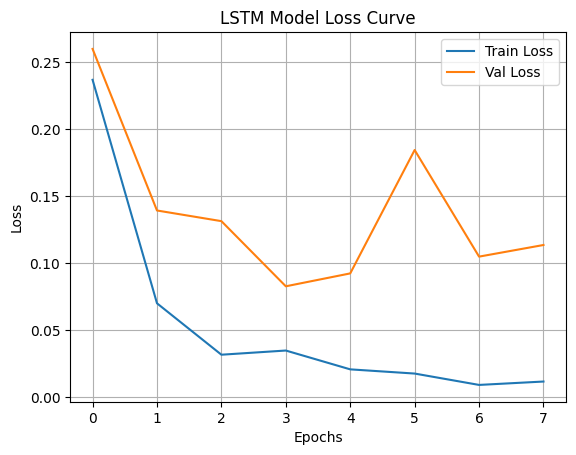

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('LSTM Model Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

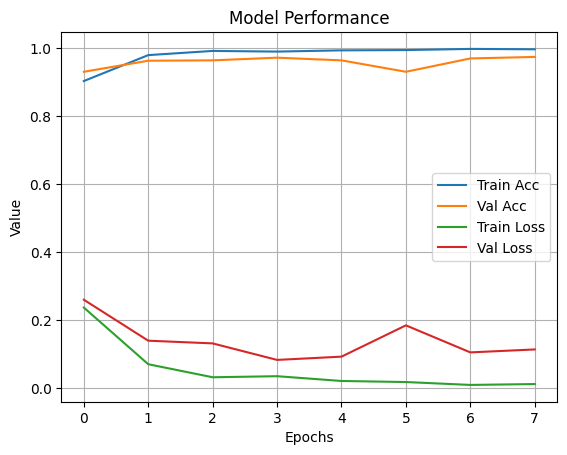

In [ ]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Performance')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# ✅ Techniques Applied for Overfitting & Underfitting
| Technique                                         | Type                     | Applied |
| ------------------------------------------------- | ------------------------ | ------- |
| **EarlyStopping**                                 | Overfitting              | ✅       |
| **Dropout Layers**                                | Overfitting              | ✅       |
| **BatchNormalization**                            | Underfitting/Overfitting | ✅       |
| **ReduceLROnPlateau**                             | Overfitting              | ✅       |
| **Validation Split**                              | Overfitting              | ✅       |
| **Tokenizer + OOV Token**                         | Underfitting             | ✅       |
| **Increased Embedding Dim**                       | Underfitting             | ✅       |
| **Model Complexity** (Balanced LSTM/Hidden Units) | Bias-Variance Balance    | ✅       |


# 🧪 Bonus Tip:
we can also use K-Fold Cross Validation for even better performance estimation, especially when tuning for underfitting.

# 🔬 Advanced Email Spam Detection Project

1. Complex ML Model (e.g. Stacked Ensemble)

2. Advanced DL Model (e.g. Multi-layer Bidirectional LSTM + Attention)

3. Apply comprehensive anti-overfitting & underfitting strategies

In [21]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.ensemble import StackingClassifier

# TF-IDF + Meta Learner Ensemble
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, max_depth=10)),
    ('gb', GradientBoostingClassifier(n_estimators=100)),
]

meta_model = LogisticRegression()

stacked = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, ngram_range=(1, 2))),
    ('model', stacked)
])

pipeline.fit(df['clean_text'], df['label'])
y_pred = pipeline.predict(df['clean_text'])
print(classification_report(df['label'], y_pred))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4825
           1       0.99      0.86      0.92       747

    accuracy                           0.98      5572
   macro avg       0.99      0.93      0.96      5572
weighted avg       0.98      0.98      0.98      5572



In [22]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Bidirectional, LSTM, Dense, Dropout, Layer, GlobalAveragePooling1D
from tensorflow.keras.models import Model

class AttentionLayer(Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__()

    def build(self, input_shape):
        self.W = self.add_weight(name='att_weight', shape=(input_shape[-1], 1),
                                 initializer='random_normal', trainable=True)
        super().build(input_shape)

    def call(self, x):
        e = tf.keras.backend.tanh(tf.keras.backend.dot(x, self.W))
        a = tf.keras.backend.softmax(e, axis=1)
        output = x * a
        return tf.keras.backend.sum(output, axis=1)

# Define input
inputs = Input(shape=(100,))
x = Embedding(8000, 128)(inputs)
x = Bidirectional(LSTM(128, return_sequences=True))(x)
x = Dropout(0.5)(x)
x = AttentionLayer()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.3)(x)
outputs = Dense(1, activation='sigmoid')(x)

model = Model(inputs, outputs)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 100, 128)       │     1,024,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 100, 256)       │       263,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_layer                 │ (None, 256)            │           256 │
│ (AttentionLayer)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,303,937 (4.97 MB)

 Trainable params: 1,303,937 (4.97 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
# X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['label'], test_size=0.2, random_state=42,stratify=df['label'])

In [34]:
X = df['clean_text']
y = df['label']

tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)
word_index = tokenizer.word_index
padded = pad_sequences(sequences, padding='post', maxlen=100)

X_train, X_test, y_train, y_test = train_test_split(padded, y, test_size=0.2, random_state=42,stratify=y)

In [36]:
# X_train = X_train_vec.toarray()
# X_test = X_test_vec.toarray()

In [35]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=2, factor=0.5)

history = model.fit(X_train, y_train, validation_split=0.2,
                    epochs=15, batch_size=32,
                    callbacks=[early_stop, reduce_lr])

Epoch 1/15
112/112 ━━━━━━━━━━━━━━━━━━━━ 47s 373ms/step - accuracy: 0.8644 - loss: 0.5063 - val_accuracy: 0.8430 - val_loss: 0.4058 - learning_rate: 1.0000e-04
Epoch 2/15
112/112 ━━━━━━━━━━━━━━━━━━━━ 38s 338ms/step - accuracy: 0.8620 - loss: 0.3711 - val_accuracy: 0.8430 - val_loss: 0.3759 - learning_rate: 1.0000e-04
Epoch 3/15
112/112 ━━━━━━━━━━━━━━━━━━━━ 44s 367ms/step - accuracy: 0.8651 - loss: 0.3069 - val_accuracy: 0.9002 - val_loss: 0.2306 - learning_rate: 1.0000e-04
Epoch 4/15
112/112 ━━━━━━━━━━━━━━━━━━━━ 38s 341ms/step - accuracy: 0.9591 - loss: 0.1336 - val_accuracy: 0.9641 - val_loss: 0.1287 - learning_rate: 1.0000e-04
Epoch 5/15
112/112 ━━━━━━━━━━━━━━━━━━━━ 40s 359ms/step - accuracy: 0.9778 - loss: 0.0961 - val_accuracy: 0.9675 - val_loss: 0.1258 - learning_rate: 1.0000e-04
Epoch 6/15
112/112 ━━━━━━━━━━━━━━━━━━━━ 41s 359ms/step - accuracy: 0.9874 - loss: 0.0606 - val_accuracy: 0.9652 - val_loss: 0.1219 - learning_rate: 1.0000e-04
Epoch 7/15
112/112 ━━━━━━━━━━━━━━━━━━━━ 41s 35

In [37]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

y_prob = model.predict(X_test).ravel()
y_pred = (y_prob >= 0.5).astype(int)

print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))


35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - accuracy: 0.9776 - loss: 0.0911
Test Accuracy: 0.9713
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       966
           1       0.91      0.87      0.89       149

    accuracy                           0.97      1115
   macro avg       0.94      0.93      0.94      1115
weighted avg       0.97      0.97      0.97      1115

ROC AUC Score: 0.9839440299025942


In [38]:
model.evaluate(X_train,y_train)

140/140 ━━━━━━━━━━━━━━━━━━━━ 14s 99ms/step - accuracy: 0.9904 - loss: 0.0430


[0.05501905083656311, 0.9869867563247681]

In [42]:
print(classification_report(y_test, y_pred))

# Convert probabilities to class labels (0 or 1)
y_pred_class = [1 if p >= 0.5 else 0 for p in y_pred]

# Now compute classification metrics
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(confusion_matrix(y_test, y_pred))
print(f'accuracy_score:- {accuracy_score(y_test, y_pred)}')
print(f'f1_score:- {f1_score(y_test, y_pred)}')
print(f'precision_score:- {precision_score(y_test, y_pred)}')
print(f'recall_score:- {recall_score(y_test, y_pred)}')
print(f'roc_auc_score:- {roc_auc_score(y_test, y_prob)}')

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       966
           1       0.91      0.87      0.89       149

    accuracy                           0.97      1115
   macro avg       0.94      0.93      0.94      1115
weighted avg       0.97      0.97      0.97      1115

Accuracy: 0.9713004484304932
[[953  13]
 [ 19 130]]
accuracy_score:- 0.9713004484304932
f1_score:- 0.8904109589041096
precision_score:- 0.9090909090909091
recall_score:- 0.87248322147651
roc_auc_score:- 0.9839440299025942


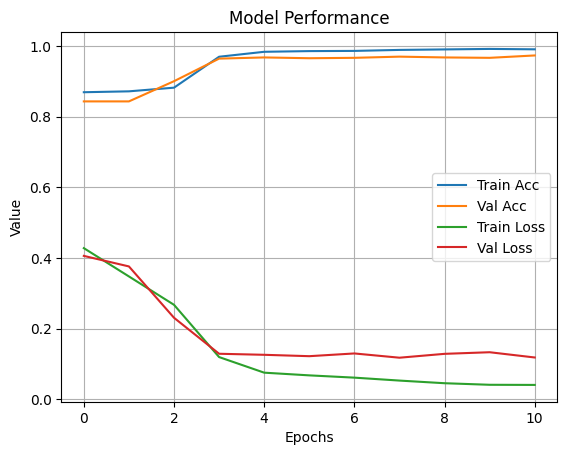

In [43]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Performance')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

| Technique             | Used in ML | Used in DL | Purpose                                       |
| --------------------- | ---------- | ---------- | --------------------------------------------- |
| TF-IDF Regularization | ✅          | ❌          | Prevent overfitting in text vectorization     |
| Ensemble Stacking     | ✅          | ❌          | Reduce bias and variance                      |
| Bidirectional LSTM    | ❌          | ✅          | Learn both forward/backward text patterns     |
| Attention Layer       | ❌          | ✅          | Focus on important words (semantic filtering) |
| Dropout               | ✅          | ✅          | Randomly deactivate neurons                   |
| EarlyStopping         | ✅          | ✅          | Stop when performance plateaus                |
| ReduceLROnPlateau     | ✅          | ✅          | Adjust learning rate dynamically              |
| Validation Split      | ✅          | ✅          | Generalization monitoring                     |
| BatchNormalization    | Optional   | ✅          | Stable training (try if underfitting occurs)  |


# 🧠 Bonus: Save Tokenizer and Model (Run this after training)

In [44]:
import joblib

# Save tokenizer
joblib.dump(tokenizer, "tokenizer.pkl")

# Save model
model.save("spam_lstm_model.h5")
